<a href="https://colab.research.google.com/github/11jolek11/BigData/blob/yfinance/List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start


In [34]:
!pip install -q yfinance
!pip install -q hurst
!pip install -q nolds

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from scipy.stats import entropy, kurtosis
import hurst
from nolds import corr_dim, hurst_rs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize, Normalizer

Generowanie danych


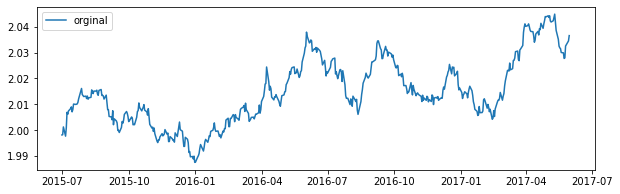

In [36]:
N = 500
scalar = 10

t = pd.date_range('2015-07-01', periods=N, freq=BDay())

random_changes = 1. + np.random.randn(N) / 1000.
raw_x = np.cumprod(random_changes)*2  # create a random walk from random changes
x = pd.Series(raw_x, index=t)

# pp = hurst.compute_Hc(x, kind='price', simplified=True)

plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

# print(pp[0])

# Zad 1
Wersja biblioteczna

In [37]:
x.describe()

count    500.000000
mean       2.014595
std        0.012741
min        1.987488
25%        2.005640
50%        2.013045
75%        2.023329
max        2.044848
dtype: float64

In [38]:
print(kurtosis(x))

-0.5040900869880613


# Zad 2

In [39]:
E = entropy(x)
print(E)

6.2145881518851285


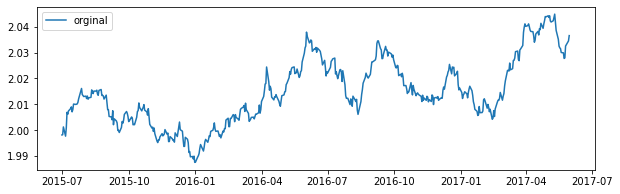

In [40]:
plt.figure(figsize=(10,3))
plt.plot(t, x, label='orginal')
plt.legend()
plt.show()

In [41]:
print(hurst.compute_Hc(x)[0])

0.4836466293048044


In [42]:
print(corr_dim(x, 1))

0.9178073592637147


# Zad 3


In [43]:
# Szerokosc okna 
h = 100

Dla zadania 1


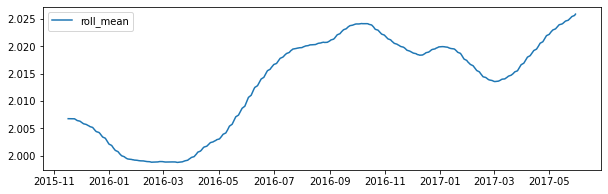

In [44]:
roll_mean = x.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

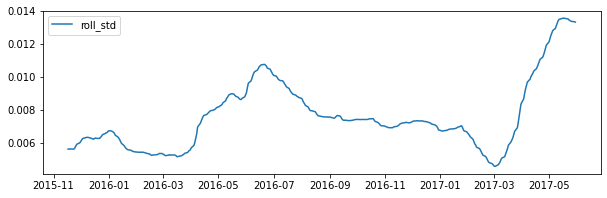

In [45]:
roll_std = x.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

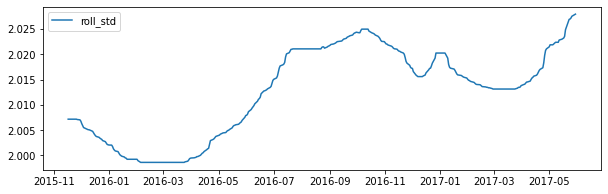

In [46]:
roll_median = x.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

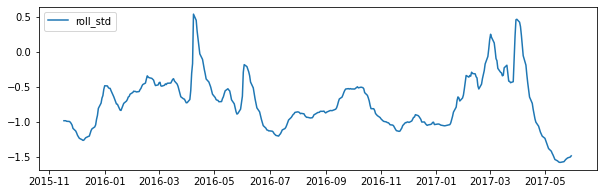

In [47]:
roll_kurtosis = x.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

Do zadania 2

In [48]:
def entopy_base_2(data):
    return entropy(data)

In [49]:
def first_hurst(data):
    return hurst.compute_Hc(data)[0]

In [50]:
def fractal_dim(data):
    return corr_dim(data, 1)

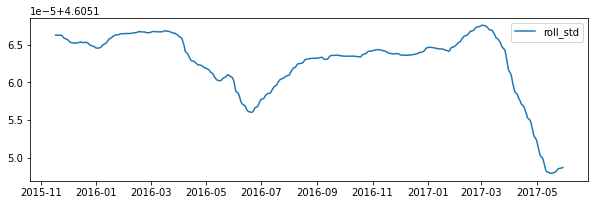

In [51]:
roll_entropy = x.rolling(h).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

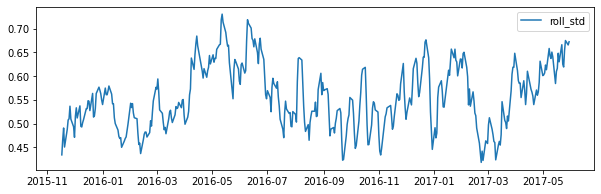

In [52]:
roll_hurst = x.rolling(h).apply(first_hurst)

plt.figure(figsize=(10,3))
plt.plot(t, roll_hurst, label='roll_std')
plt.legend()
plt.show()

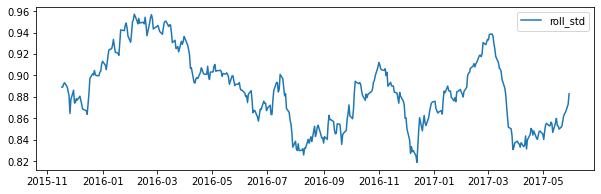

In [53]:
roll_fractal = x.rolling(h).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()

# Zad 4

Normalized


[[0.04435419 0.04435627 0.04442324 0.044344   0.0444153  0.04454879
  0.04453179 0.04456006 0.04458098 0.04459563 0.04455295 0.04457214
  0.0446196  0.04461664 0.04461803 0.04462059 0.04463411 0.04466452
  0.04472916 0.04475362 0.0447018  0.04469347 0.04468444 0.04468758
  0.04466707 0.0446884  0.04466131 0.04467343 0.04467754 0.04474129
  0.04472769 0.04470938 0.04473131 0.0447308  0.04473877 0.04470575
  0.04469474 0.04473682 0.04474464 0.04469336 0.04469506 0.04468955
  0.04466244 0.0446964  0.04463762 0.04457231 0.04457141 0.04451324
  0.04450942 0.04448516 0.0445623  0.04444233 0.04449312 0.04447499
  0.04445831 0.04439285 0.04439416 0.04437543 0.04441892 0.0444699
  0.04445596 0.0444824  0.04453085 0.04455589 0.04454065 0.04451302
  0.04446911 0.04447737 0.04450911 0.04449835 0.04444157 0.04444446
  0.04444226 0.04450624 0.0445553  0.04456346 0.04462936 0.04459067
  0.04456103 0.04457803 0.04459159 0.04461485 0.04456787 0.04455242
  0.0445245  0.04458017 0.0445096  0.0444457  0.0

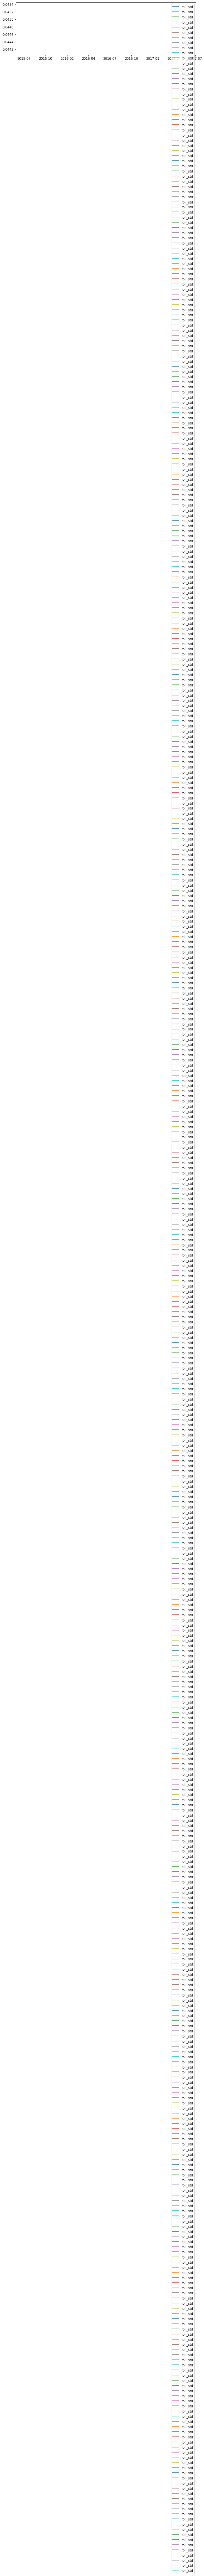

In [73]:
# print(raw_x.shape)
# dump_feature = np.arange(N).reshape(-1, 1)
raw_x = raw_x.reshape(1, -1)
t = np.array(x.index.to_pydatetime(), dtype=np.datetime64)
t = t.reshape(1, -1)
# x_stack = np.column_stack((raw_x, dump_feature))
normalized = normalize(raw_x, norm='l2')
# normalized = normalize(x_stack, norm='l2')

# print(normalized)
# print(raw_x)
print(normalized)
plt.figure(figsize=(10,3))
plt.plot(t, normalized, label='roll_std')
plt.legend()
plt.show()

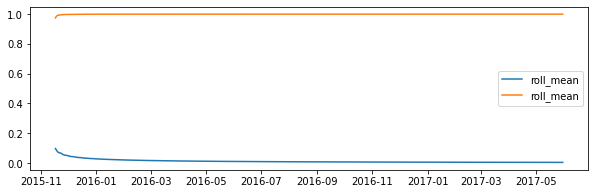

In [55]:
normalized = pd.DataFrame(normalized)

roll_mean = normalized.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

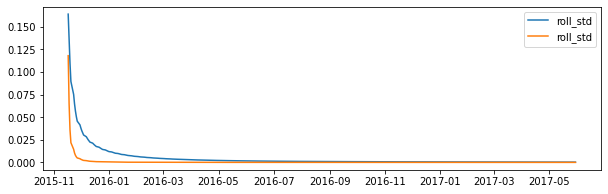

In [56]:
roll_std = normalized.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

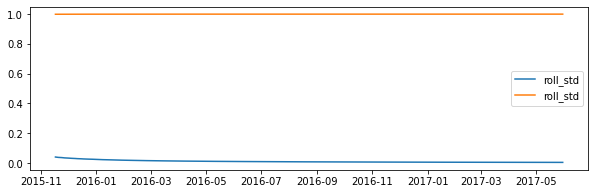

In [57]:
roll_median = normalized.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

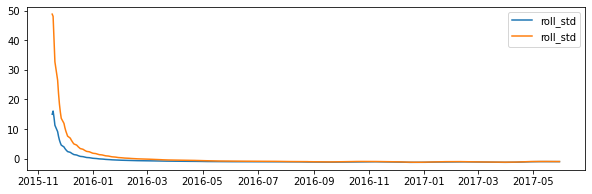

In [58]:
roll_kurtosis = normalized.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

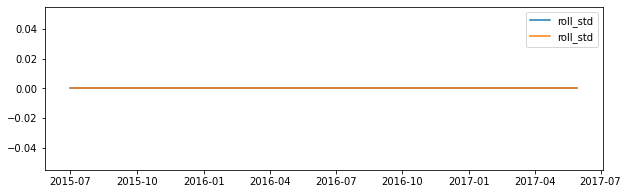

In [59]:
roll_entropy = normalized.rolling(1).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

Stand


In [60]:
scaler = StandardScaler()
raw_x = raw_x.reshape(-1, 1)
stand = scaler.fit_transform(raw_x)

stand = pd.DataFrame(stand)

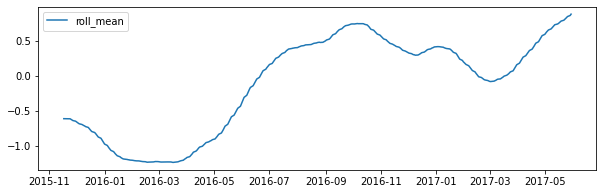

In [61]:
roll_mean = stand.rolling(h).mean()

plt.figure(figsize=(10,3))
plt.plot(t, roll_mean, label='roll_mean')
plt.legend()
plt.show()

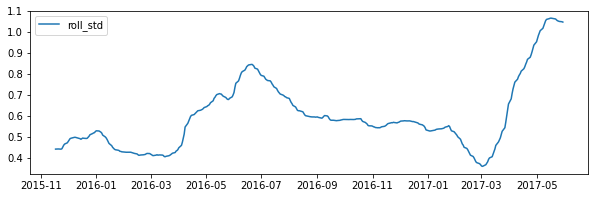

In [62]:
roll_std = stand.rolling(h).std()

plt.figure(figsize=(10,3))
plt.plot(t, roll_std, label='roll_std')
plt.legend()
plt.show()

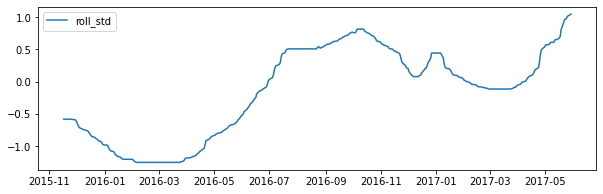

In [63]:
roll_median = stand.rolling(h).median()

plt.figure(figsize=(10,3))
plt.plot(t, roll_median, label='roll_std')
plt.legend()
plt.show()

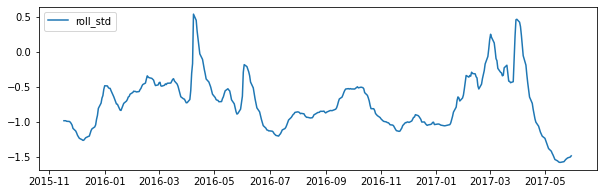

In [64]:
roll_kurtosis = stand.rolling(h).apply(kurtosis)

plt.figure(figsize=(10,3))
plt.plot(t, roll_kurtosis, label='roll_std')
plt.legend()
plt.show()

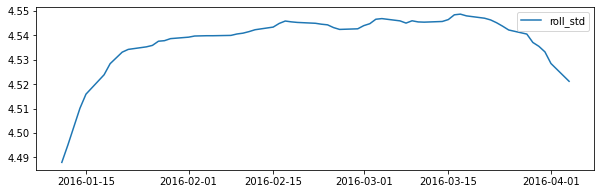

False


In [65]:
roll_entropy = stand.rolling(h).apply(entopy_base_2)

plt.figure(figsize=(10,3))
plt.plot(t, roll_entropy, label='roll_std')
plt.legend()
plt.show()

print(pd.DataFrame(stand).isnull().values.any())
# from IPython.display import display, HTML
# display(pd.DataFrame(stand)[6000:700])


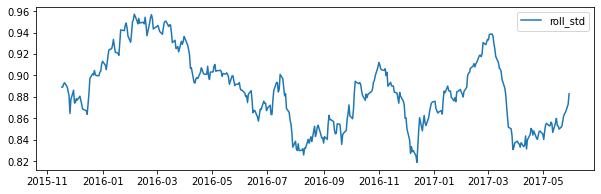

In [66]:
roll_fractal = stand.rolling(h).apply(fractal_dim)

plt.figure(figsize=(10,3))
plt.plot(t, roll_fractal, label='roll_std')
plt.legend()
plt.show()